In [1]:
%matplotlib inline

# Basis Vectors and Orthogonality

If the idea of a basis is one of the foundations of linear algebra, then the specialization to an orthogonal basis is not far behind. We need a basis to convert geometric constructions into algebraic calculations, and we need an orthogonal basis to make those calculations simple. There is even a further specialization, which makes the basis just about optimal: The vectors should have length one. That can be achieved, but to do it we have to know

1. the length of a vector
2. the test for perpendicular vectors
3. how to create perpendicular vectors from linearly independent vectors.

Gilbert Strang Linear Algebra

We have previously addressed two of three features

The length of a vector is the norm.
The test for perpendicularity is done with the inner product.

## Example of basis vectors

The idea of basis vectors for a vector space is the following: Can linear combinations of a set of vectors be used to reach every point in the vector space?

To explore this, we will consider the two-dimension ($\Re^2$) space of the x-y plane. A pair of basis vectors for this space is 

\begin{eqnarray}
e_1 = \begin{bmatrix}
\begin{array}{r{\quad}1}
1 \\ 0
\end{array}
\end{bmatrix}, e_2 = \begin{bmatrix}
\begin{array}{r{\quad}1}
0 \\ 1
\end{array}
\end{bmatrix}
\end{eqnarray}

These vectors are drawn below. These vectors happen to be **unit vectors** (norm/length of 1) and orthogonal ($\mathbf{e_2}^T \mathbf{e_1}=0$).

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from myla.utils import *

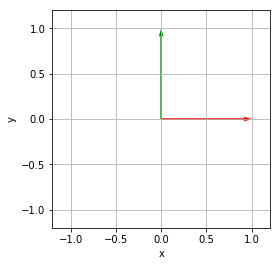

In [5]:
draw_vectors((1,0, "red"),(0,1, "green"))

You can get to anywhere in the plane by some combination of $\mathbf{e_1}$ and $\mathbf{e_2}$, something we probably explored in elementary school. 

For example, I an get to the point $(15,-3)$ with 

\begin{equation}
15\times \mathbf{e_1} + -3 \times \mathbf{e_2}
\end{equation}

Our basis functions do not need to be unit vectors. For example, we could have the following basis vectors:

\begin{eqnarray}
e_3 = \begin{bmatrix}
\begin{array}{r{\quad}1}
7 \\ 0
\end{array}
\end{bmatrix}, e_4 = \begin{bmatrix}
\begin{array}{r{\quad}1}
0 \\ -2
\end{array}
\end{bmatrix}
\end{eqnarray}

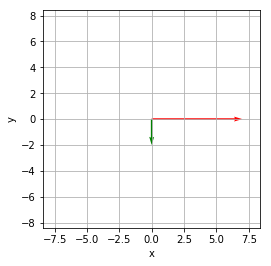

In [6]:
draw_vectors((7,0, "red"),(0,-2, "green"))

Our arithmetic might get a little more complex, but we can still use $\mathbf{e_3}$ and $\mathbf{e_4}$ to get anywhere in the plane. For example to get to get our point $(15,-3)$ we would do the following

\begin{equation}
\frac{15}{7}\times \mathbf{e_1} + \frac{3}{2} \times \mathbf{e_2}
\end{equation}

In [7]:
e_3 = np.matrix([[7],[0]])
e_4 = np.matrix([[0],[-2]])

In [8]:
isinstance([1,3],(np.ndarray, list, tuple))

True

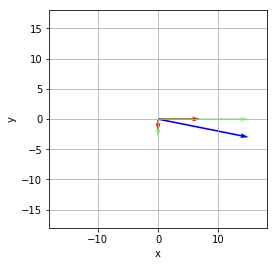

In [9]:

draw_vectors((e_3, "red"),
             (e_4, "red"), 
             ((15/7)*e_3,(0,1,0,0.5)), 
             ((3/2)*e_4, (0,1,0,0.5)),
             ((15/7)*e_3 + (3/2)*e_4,"blue"))

In [10]:
v3 = np.array([1.0,0.2])
v3 = v3/la.norm(v3)
v3
def unit_vectors(*v):
    vs = [np.array(vv)/la.norm(vv) for vv in v]
    return vs

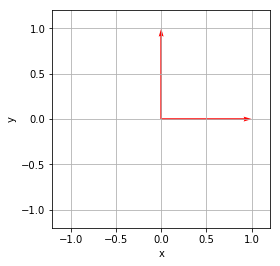

In [11]:
draw_vectors((1,0, "red"),(0,1, "red"))

In [12]:
(*(zip(["red","green"],unit_vectors((1.01,0.0),(1.01,0.2)))),1)

(('red', array([1., 0.])), ('green', array([0.98095245, 0.19424801])), 1)

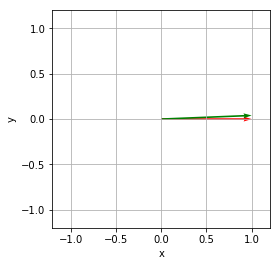

In [13]:
draw_vectors(*(zip(unit_vectors((5,0.0),(5.0,0.2)),("red","green"))))

### Write

1. Specifications (Docstring?) for each function (step?)
1. Write a test for each specified function
1. Write a function that satisfies the test

## QR Factorization

What is the relationship between $A$ and $Q$? In other words, what matrix $R$ do we need such that 
\begin{equation}
A = QR?
\end{equation}


Any vector can be expressed as a weighted sum of basis vectors:

\begin{equation}
\mathbf{b} = x_1\mathbf{q_1}+x_2\mathbf{q_2}+\cdots+x_n\mathbf{q_n}
\end{equation}

How do we compute $x_i$?
If the basis functions are orthonormal (as we've created in $Q$) and we multiply both sides by $\mathbf{q_i}^T$ we get


\begin{equation}
\mathbf{q_i}^T\mathbf{b} = \mathbf{q_i}^Tx_1\mathbf{q_1}+\mathbf{q_i}^Tx_2\mathbf{q_2}+\cdots+\mathbf{q_i}^Tx_n\mathbf{q_n}
\end{equation}


But since $Q$ is orthonormal 

\begin{equation}
  \mathbf{q_i}^T\mathbf{q_j} =
  \begin{cases}
    1 & \text{if $i = j$} \\
    0 & \text{otherwise}
  \end{cases}
\end{equation}

\begin{equation}
\mathbf{q_i}^T\mathbf{b} = x_i
\end{equation}

So any vector $\mathbf{b}$ can be expressed as

\begin{equation}
\mathbf{b} = (\mathbf{q_1}^T\mathbf{b})\mathbf{q_1}+(\mathbf{q_2}^T\mathbf{b})\mathbf{q_2}+\cdots+(\mathbf{q_n}^T\mathbf{b})\mathbf{q_n}
\end{equation}

Based on this we can reconstruct the columns of $A$ from $Q$ by

\begin{equation}
\mathbf{a_i} = \sum_{j=1}^{j < i}\mathbf{q_j}^T\mathbf{a_i}
\end{equation}

What does this look like in matrix form? It is multiplication of $Q$ by an upper right triangular matrix $R$

\begin{equation}
A=QR = \begin{bmatrix}
\begin{array}{cccc{\qquad}1}
\mathbf{q_1} & \mathbf{q_2} & \cdots & \mathbf{q_n}
\end{array}
\end{bmatrix}
\begin{bmatrix}
\begin{array}{cccc{\qquad}1}
\mathbf{q_1}^T\mathbf{a_1} & \mathbf{q_1}^T\mathbf{a_2} & \cdots & \mathbf{q_1}^T\mathbf{a_n}\\
0 & \mathbf{q_2}^T\mathbf{a_2} & \cdots & \mathbf{q_2}^T\mathbf{a_n}\\
\vdots& \vdots & \vdots & \vdots \\
0 & 0 & 0 & \mathbf{q_n}^T\mathbf{a_n}
\end{array}
\end{bmatrix}
\end{equation}